In [214]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import numpy.random as npr
from numba import jit,  njit, float64

from math import pi, cos, sin
tau = 2*pi

In [179]:
bounds=[[0.,tau/8],[3*tau/8,tau/2]]

In [326]:
@njit
def random_disjoint_intervals(bounds):
    lens = collapse_intervals(bounds)
    total_len=lens[-1]
    
    R=npr.rand()*total_len
    
    idx=0
    for i in range(len(bounds)):
        if R <= lens[i]:
            idx = i
            break
    lb = bounds[idx][0]
    ub = bounds[idx][1]
    R_star = (ub-lb)*npr.rand()+lb
    return R_star

@njit
def collapse_intervals(bounds):
    lens=[]
    for i in range(len(bounds)):
        lb=bounds[i][0]
        ub=bounds[i][1]
        lens.append(ub-lb)
    lens=np.array(lens)
    return lens.cumsum()

def check_bounds(v,bounds):
    for b in bounds:
        if v>=b[0] and v<=b[1]:
            return v
    return min([(abs(x-v),x) for x in bounds.flatten()])[1]

for i in range(10):
    print(check_bounds(i,np.array([[1,1.5],[7.5,9]])))
        

1.0
1
1.5
1.5
1.5
7.5
7.5
7.5
8
9


In [296]:
%timeit random_disjoint_intervals(np.array([[0.,3.],[3.5,10.]]))

The slowest run took 8.79 times longer than the fastest. This could mean that an intermediate result is being cached.
9.67 µs ± 11.2 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


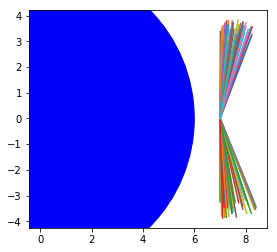

In [329]:
N=10000
bounds={'pos':np.array([[0,0*tau]]),'ang':np.array([[0,1*tau/16],[tau/2-tau/16,tau/2]]),'burn':np.array([[3.2,3.9]])}
pts=[]
for i in range(N):
    newpt=[]
    for b in bounds.values():
        newpt.append(random_disjoint_intervals(b))
    pts.append(newpt)
    
# for i,x in enumerate(np.array(pts).T):
#     plt.hist(x,bins=100)
#     plt.show()
    
ax=plt.gca()
earth=plt.Circle((0,0),6,color='blue')
ax.set_aspect('equal')
for psi in pts[::100]:
    pos,ang,burn=psi
    
    vhat_x,vhat_y=sin(pos),-cos(pos)
    x0,y0 = 7*cos(pos),7*sin(pos)
    burnvx=cos(ang)*vhat_x - sin(ang) * vhat_y
    burnvy=sin(ang)*vhat_x + cos(ang) * vhat_y
    
    
    ax.plot([x0,burn*burnvx+x0],[y0,burn*burnvy+y0])
ax.scatter(0,0) # make sur earth is on screen
ax.add_artist(earth)
plt.show()

In [259]:
bounds.values()

dict_values([array([[0.        , 1.57079633]]), array([[0.        , 0.78539816]]), array([[3.2, 3.9]])])

In [301]:
for b in enumerate(bounds.values()):
    print(b)

(0, array([[0., 0.]]))
(1, array([[0.        , 0.39269908],
       [2.74889357, 3.14159265]]))
(2, array([[3.2, 3.9]]))
